This work is done in the context of Machine Learning Course at TBS.

In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from scipy import stats
from IPython.display import display
from scipy.stats import ks_2samp, chi2_contingency
from IPython.display import display
from scipy.stats import ks_2samp, chi2_contingency
from IPython.display import display
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import keras_tuner as kt


First Look:

In [2]:
df = pd.read_csv(r'C:\Users\Dorra\Pictures\ML\mushroom_cleaned.csv')
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


Nb of entries in our dataset:

In [3]:
df.shape

(54035, 9)

Columns and types:

In [4]:
df.dtypes


cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

The dataset provided is already cleaned, but we will check nonetheless:

In [5]:
df.isnull().sum()


cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

Descriptive Statistics:

In [6]:
df.describe().iloc[1:]


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


Correlation between Class and the rest of the columns:

In [7]:
df_corr = df.corr()['class'][:-1] # -1 to remove the last row which is class
df_corr.sort_values()

stem-width        -0.182856
cap-diameter      -0.165676
cap-shape         -0.133338
stem-color        -0.128339
season            -0.082919
gill-color        -0.063947
gill-attachment   -0.052541
stem-height        0.183354
Name: class, dtype: float64

Observations from Data Exploration:
- Dataset has 54035 rows and 9 columns.
- Data type of all columns is numerical (float or integer).
- All values are non-null. Therefore no missing values.
- Correlation between class and feature columns in df is low, absolute value ranging between 5% and 18.3%.

The dataset has already undergone z-score normalization, so we will skip that step.

Outliers:

In [8]:
# Calculate the z-scores for each column
z_scores = pd.DataFrame(stats.zscore(df), columns=df.columns)

# Generate descriptive statistics for the z-scores
z_scores.describe().round(3)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000,54035.000,54035.000,54035.000,54035.000,54035.000,54035.000,54035.000,54035.000
mean,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.576,-1.852,-0.961,-2.290,-1.165,-1.344,-2.581,-3.026,-1.104
25%,-0.773,-0.926,-0.961,-0.728,-0.750,-0.806,-0.741,-0.208,-1.104
50%,-0.117,0.463,-0.512,0.210,-0.255,-0.164,0.792,-0.029,0.906
75%,0.594,0.926,0.834,0.834,0.454,0.603,0.792,-0.029,0.906
max,3.678,0.926,1.731,1.147,4.726,3.220,1.098,2.788,0.906


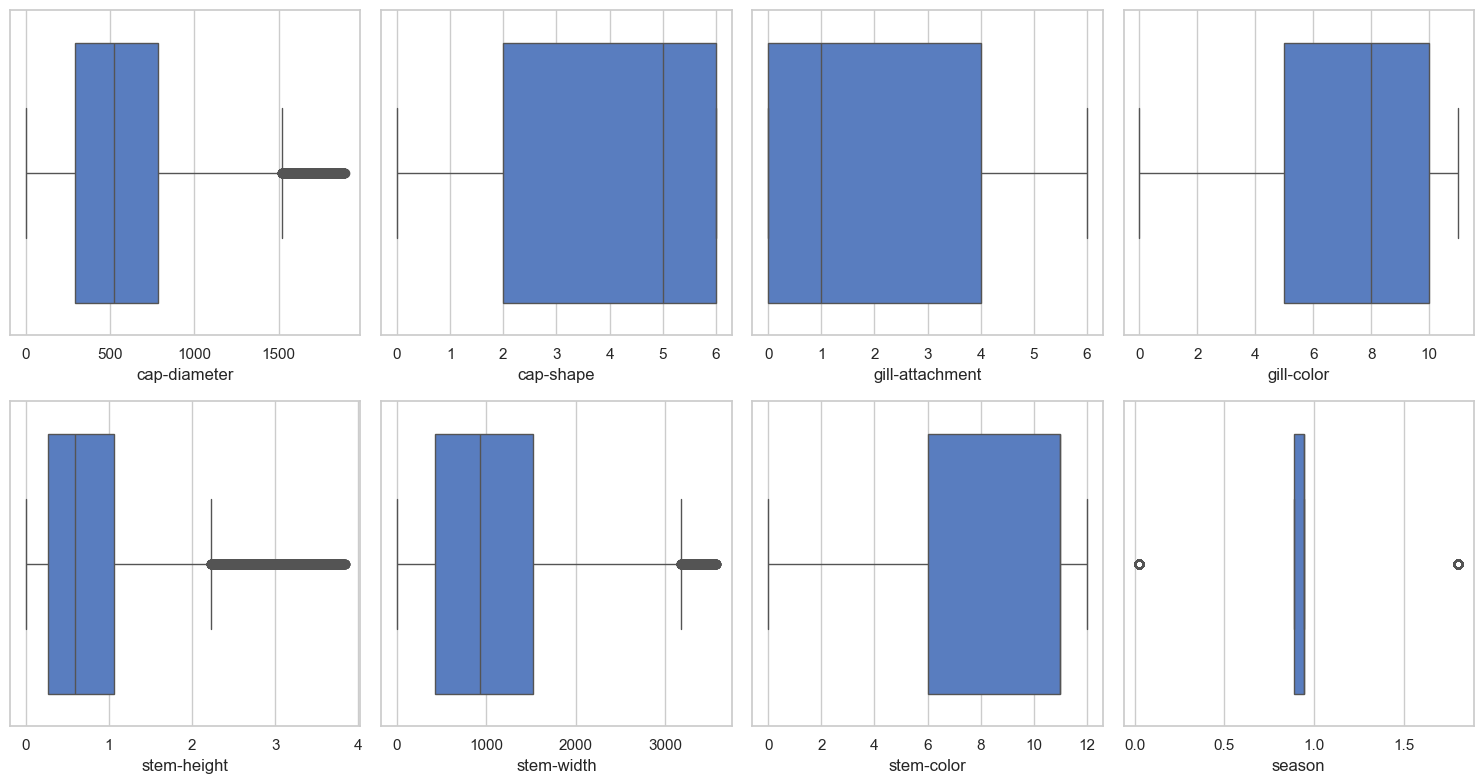

In [86]:
columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color','stem-height', 'stem-width', 'stem-color', 'season']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axs = axs.flatten()
for i, column in enumerate(columns):
    sns.boxplot(data=df, x=column, ax=axs[i])  

plt.tight_layout()  
plt.show() 

In [9]:
# Identify rows where any of the z-scores exceed the threshold
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Drop the identified rows containing outliers
df_no_outliers = df.drop(outliers.index)

Let's drop rows containing outliers (with Z-score > 3).

In [10]:
# Calculate number of rows of original dataframe, of new one and how many rows were removed
new_num_r = df_no_outliers.shape[0]
old_num_r = df.shape[0]
removed = old_num_r - new_num_r

print("New dataframe has {} rows. {} rows were removed.".format(new_num_r, removed))

New dataframe has 50397 rows. 3638 rows were removed.


Overall Class Imbalance:

Overall Class Distribution:
       proportion
class            
1       54.918109
0       45.081891


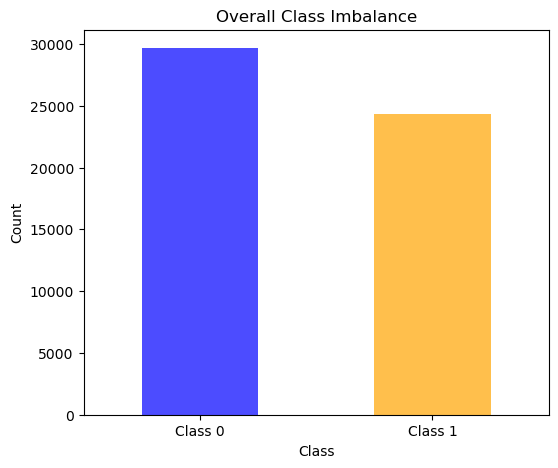

In [11]:
# Calculate overall class distribution
class_counts = df['class'].value_counts(normalize=True) * 100

# Display the class distribution
print("Overall Class Distribution:")
print(class_counts.to_frame())

# Visualizing Overall Class Imbalance with Blue and Orange Colors
plt.figure(figsize=(6, 5))
df['class'].value_counts().plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title("Overall Class Imbalance")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'], rotation=0)
plt.show()


Classes are overall reasonably balanced.

Features Class Imbalance:

In [12]:


# Define feature columns (excluding the target column 'class')
feature_columns = df.columns[df.columns != 'class']

# Re-run statistical tests for feature-class imbalance

# Dictionary to store test results
feature_class_imbalance_results = {}

# Iterate through each feature and perform statistical tests
for feature in feature_columns:
    # If the feature is numerical, use KS-Test
    if df[feature].dtype in ['int64', 'float64']:
        stat, p_value = ks_2samp(df[df['class'] == 1][feature], df[df['class'] == 0][feature])
        feature_class_imbalance_results[feature] = {'Test': 'KS-Test', 'Statistic': stat, 'P-Value': p_value}
    
    # If the feature is categorical, use Chi-Square Test
    else:
        contingency_table = pd.crosstab(df[feature], df['class'])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        feature_class_imbalance_results[feature] = {'Test': 'Chi-Square', 'Statistic': chi2, 'P-Value': p_value}

# Convert results to DataFrame for easier interpretation
feature_class_imbalance_df = pd.DataFrame.from_dict(feature_class_imbalance_results, orient='index')

# Display the statistical results
display(feature_class_imbalance_df)



# Function to calculate Cohen's d (effect size)
def cohen_d(x1, x2):
    """Calculate Cohen's d for two independent samples."""
    mean_diff = np.mean(x1) - np.mean(x2)
    pooled_std = np.sqrt((np.std(x1, ddof=1) ** 2 + np.std(x2, ddof=1) ** 2) / 2)
    return mean_diff / pooled_std

# Dictionary to store effect size results
effect_size_results = {}

# Calculate Cohen's d for each numerical feature
for feature in feature_class_imbalance_df.index:
    class_1_values = df[df['class'] == 1][feature]
    class_0_values = df[df['class'] == 0][feature]
    
    # Compute Cohen's d
    effect_size = cohen_d(class_1_values, class_0_values)
    effect_size_results[feature] = {'Cohen\'s d': effect_size}

# Convert results to DataFrame
effect_size_df = pd.DataFrame.from_dict(effect_size_results, orient='index')

# Display effect size results
display(effect_size_df)



,Test,Statistic,P-Value
cap-diameter,KS-Test,0.174199,0.000000e+00
cap-shape,KS-Test,0.125214,2.769306e-183
gill-attachment,KS-Test,0.098374,3.799099e-113
gill-color,KS-Test,0.106554,1.015611e-132
stem-height,KS-Test,0.184579,0.000000e+00
stem-width,KS-Test,0.240441,0.000000e+00
stem-color,KS-Test,0.165519,8.754843e-321
season,KS-Test,0.074226,1.521302e-64


,Cohen's d
cap-diameter,-0.337909
cap-shape,-0.271657
gill-attachment,-0.105941
gill-color,-0.128616
stem-height,0.377580
stem-width,-0.375564
stem-color,-0.261044
season,-0.164263


All features have a Cohen’s d below 0.35 (maximum one being 0.34 with cap-diameter), meaning the differences aren’t very strong. Minimal imbalance, likely not a concern.

Even though statistical tests flagged all features as imbalanced, the effect size suggests the imbalance is weak, meaning negligible impact on the models.

Skewness:

In [13]:

# Calculate skewness for each numerical feature
skewness_results = df[feature_class_imbalance_df.index].skew()

# Convert to DataFrame for better visualization
skewness_df = skewness_results.to_frame(name="Skewness")

# Display skewness results
display(skewness_df)


,Skewness
cap-diameter,0.782562
cap-shape,-0.534834
gill-attachment,0.589288
gill-color,-0.488642
stem-height,1.461606
stem-width,0.812370
stem-color,-0.632628
season,0.551232


Understanding Skewness:
Skewness ≈ 0 → Symmetrical distribution (ideal for many models).
Skewness > 0.5 → Right (Positive) Skew (long tail on the right).
Skewness < -0.5 → Left (Negative) Skew (long tail on the left).
Severely skewed features (>1 or <-1) may need log transformation, square root transformation, or normalization.

"Stem-height" (1.46) and "Cap-diameter" (0.78) are moderately to highly right-skewed. 
"Cap-shape" (-0.53) and "Gill-color" (-0.48) are slightly left-skewed, but not extreme. 
"Gill-attachment" (0.59) is mildly right-skewed.

Data Visualizations:

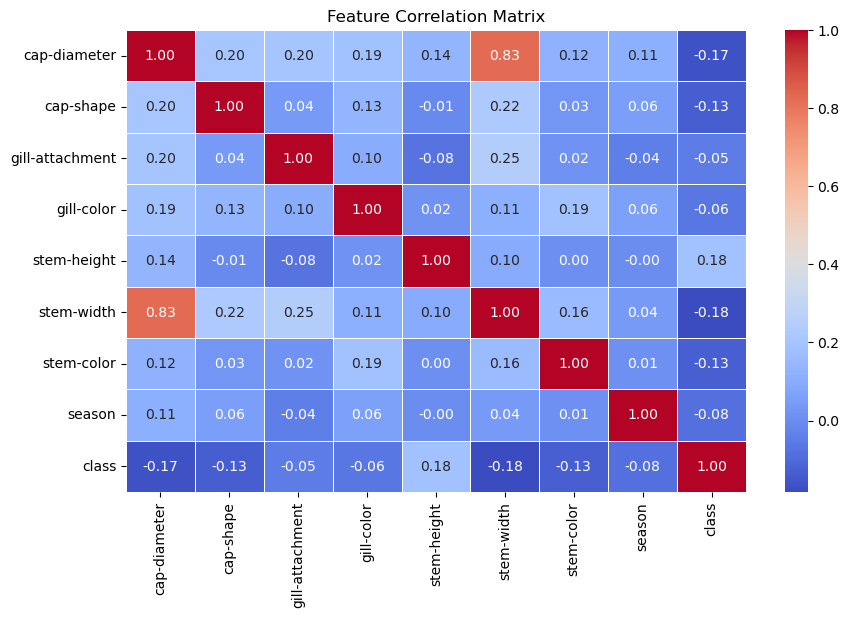

In [14]:

# Compute the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


Close to 1 → Strong positive correlation (both features increase together).
Close to -1 → Strong negative correlation (one increases while the other decreases).
Near 0 → Weak or no correlation.

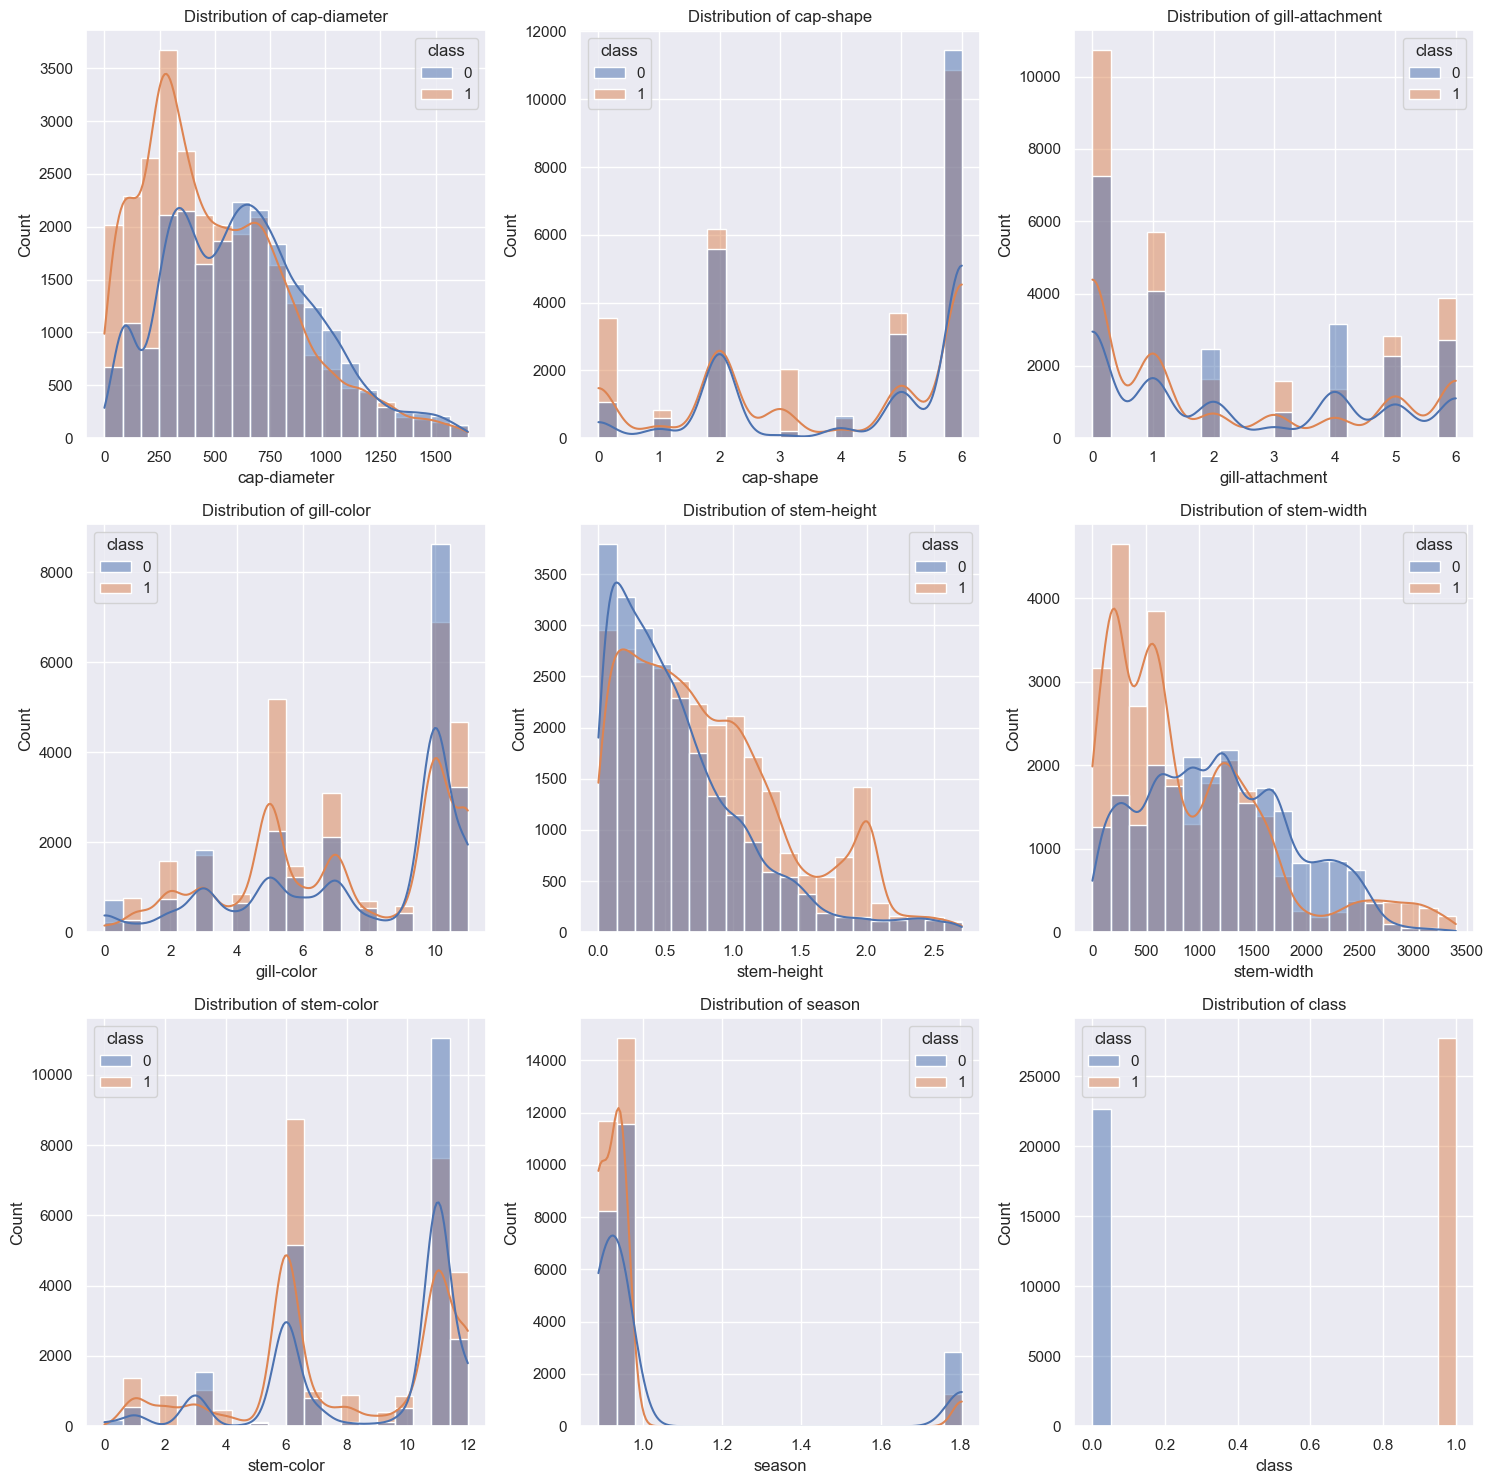

In [15]:
# Set Seaborn style
sns.set_theme()

# Create subplots with 3 columns and 3 rows
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column in the DataFrame
for i, column in enumerate(df_no_outliers.columns):
    # Create a histogram plot for the current column with hue
    sns.histplot(data=df_no_outliers, x=column, hue='class', kde=True, bins=20, ax=axes[i])
    
    # Set title for the plot
    axes[i].set_title(f'Distribution of {column}')
    
# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Display the plot
plt.show()


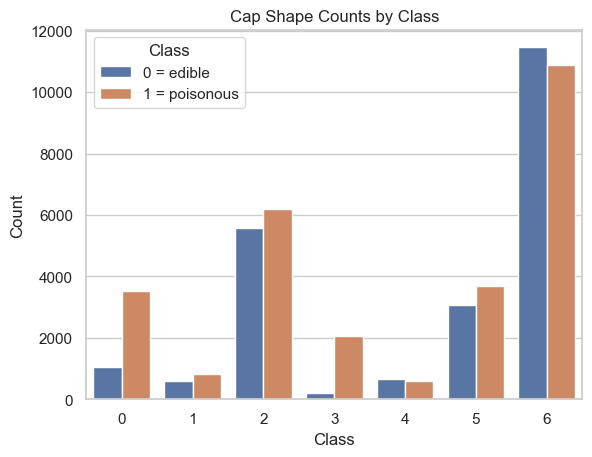

In [16]:
sns.set_theme(style="whitegrid")

# Create a count plot to visualize the distribution of 'cap-shape' with hue by 'class'
sns.countplot(hue='class', x='cap-shape', data=df_no_outliers)

# Adding title and labels
plt.title('Cap Shape Counts by Class')
plt.legend(title='Class', labels=['0 = edible', '1 = poisonous'])
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

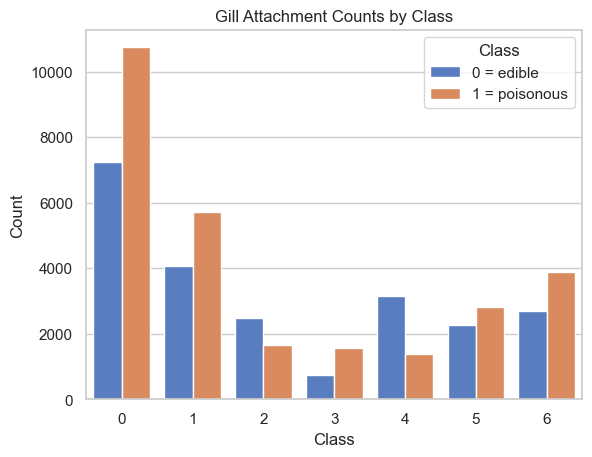

In [17]:
sns.set_theme(style="whitegrid", palette="muted", color_codes=True)

# Create a count plot to visualize the distribution of 'gill-attachment' with hue by 'class'
sns.countplot(hue='class', x='gill-attachment', data=df_no_outliers)

# Adding title and labels
plt.title('Gill Attachment Counts by Class')
plt.legend(title='Class', labels=['0 = edible', '1 = poisonous'])
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

Differences between classes are evident in the histograms and count plots. On average poisonous mushrooms have smaller cap diameters and taller, slimmer stems compared to edible ones.

Data Preprocessing:

Set a variable X equal to the numerical features and a variable y equal to the "class" column.

In [18]:
X = df_no_outliers.loc[:, df_no_outliers.columns != "class"]
y = df_no_outliers['class']

Data Scaling:

In [19]:

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

Train / Test Split: We must ensure all models use the same test and train sets so that we guarantee a fair comparison later on.

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101, stratify=y)

Defining a cross validation k fold:

In [21]:

# # Define K-Fold Cross-Validation function
# def perform_kfold_cv(model, X, y, k=5):
#     """Performs K-Fold cross-validation and returns mean accuracy."""
#     kf = KFold(n_splits=k, shuffle=True, random_state=42)
#     scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
#     return scores.mean(), scores.std()

# # Set the number of folds
# k_folds = 5

# # Confirming K-Fold setup
# kf
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)


Traditional Models:

Logistic Regression:

In [ ]:


logistic_model = LogisticRegression(max_iter=1000, random_state=42)

precision_list, recall_list, f1_list, support_list = [], [], [], []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    logistic_model.fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)

avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

report = (
    f"Logistic Regression  (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)
print(report)

Logistic Regression  (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.62        0.55        0.59        4529        
1           0.67        0.73        0.70        5550        

Accuracy    0.64        
Macro Avg   0.64        0.64        0.64        10079       
Weighted Avg0.65        0.65        0.65        10079       



In [30]:




# Define the parameter grid for C (regularization strength)
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
    "max_iter": [500, 1000, 2000]
}

# Perform GridSearchCV with K-Fold CV
grid_search = GridSearchCV(
    logistic_model,
    param_grid,
    cv=kf,
    scoring="accuracy",
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.6492


In [37]:
# Evaluate the updated model using K-Fold CV
precision_list, recall_list, f1_list, support_list = [], [], [], []
confusion_matrices = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    logistic_model.fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)
    
    # Compute and store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Compute average precision, recall, f1-score
avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

# Compute final confusion matrix (sum of all folds)
final_confusion_matrix = np.sum(confusion_matrices, axis=0)

# Generate report
report = (
    f"Logistic Regression - Final Evaluation (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)

print(report)
print("Final Confusion Matrix:")
print(final_confusion_matrix)


Logistic Regression - Final Evaluation (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.62        0.55        0.59        4529        
1           0.67        0.73        0.70        5550        

Accuracy    0.64        
Macro Avg   0.64        0.64        0.64        10079       
Weighted Avg0.65        0.65        0.65        10079       

Final Confusion Matrix:
[[12478 10167]
 [ 7514 20238]]


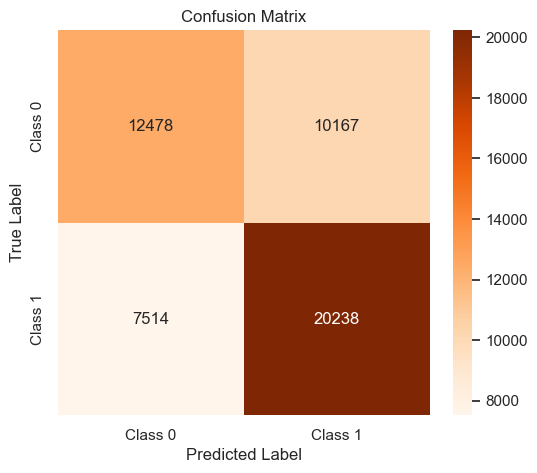

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define labels
labels = ["Class 0", "Class 1"]

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


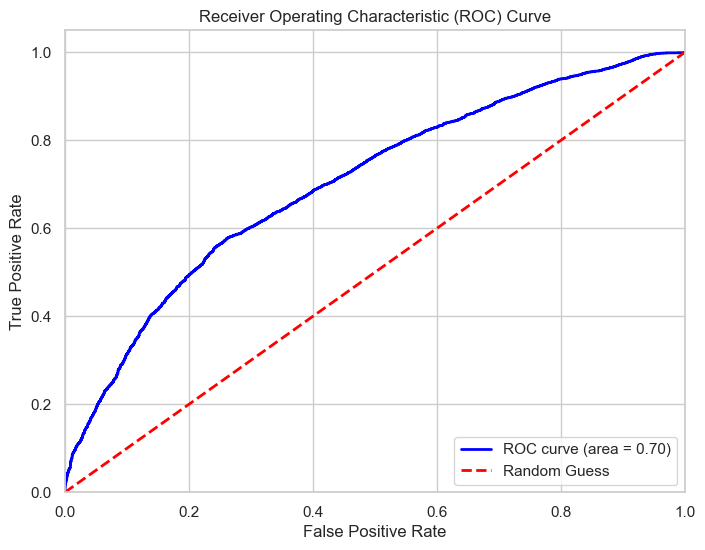

In [90]:
from sklearn.metrics import roc_curve, auc

predictions_proba = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

KNN:

In [ ]:

knn_model = KNeighborsClassifier(n_neighbors=3)

precision_list, recall_list, f1_list, support_list = [], [], [], []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)

avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

report = (
    f"K-Nearest Neighbors  (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)
print(report)


K-Nearest Neighbors  (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.69        0.70        0.69        4529        
1           0.75        0.74        0.74        5550        

Accuracy    0.72        
Macro Avg   0.72        0.72        0.72        10079       
Weighted Avg0.72        0.72        0.72        10079       



In [56]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    "n_neighbors": range(1, 21, 2),  # More values for finer tuning
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "p": [1, 2, 3],  # Optimize distance metric
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
}

# Perform RandomizedSearchCV for faster hyperparameter tuning
random_search = RandomizedSearchCV(
    knn_model,
    param_grid,
    n_iter=20,  # Randomly sample 20 combinations
    cv=kf,
    scoring="accuracy",
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best Parameters: {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.7931


c:\Users\Dorra\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [59]:

# Ensure best_params is from the KNeighborsClassifier grid search
best_knn_params = grid_search.best_params_

# Update KNN model with the best parameters
knn_model = KNeighborsClassifier(
    n_neighbors=best_knn_params['n_neighbors'],
    weights=best_knn_params['weights'],
    metric=best_knn_params['metric'],
    p=best_knn_params['p'],
    algorithm=best_knn_params['algorithm']
)

# Evaluate the updated model using K-Fold CV
precision_list, recall_list, f1_list, support_list = [], [], [], []
confusion_matrices = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)
    
    # Compute and store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Compute average precision, recall, f1-score
avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

# Compute final confusion matrix (sum of all folds)
final_confusion_matrix = np.sum(confusion_matrices, axis=0)

# Generate report
report = (
    f"K-Nearest Neighbors - Final Evaluation (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)

print(report)
print("Final Confusion Matrix:")
print(final_confusion_matrix)


K-Nearest Neighbors - Final Evaluation (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.76        0.79        0.77        4529        
1           0.82        0.80        0.81        5550        

Accuracy    0.79        
Macro Avg   0.79        0.79        0.79        10079       
Weighted Avg0.79        0.79        0.79        10079       

Final Confusion Matrix:
[[17871  4774]
 [ 5652 22100]]


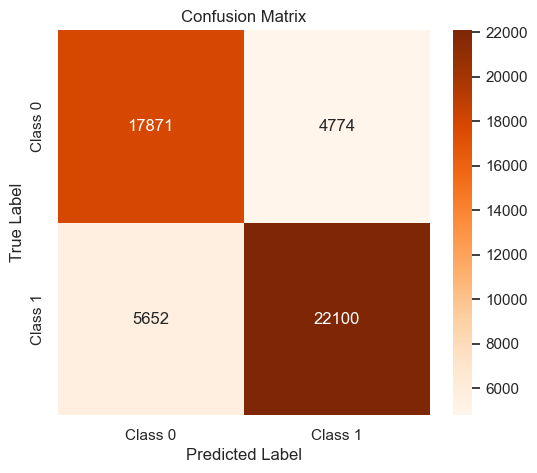

In [60]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


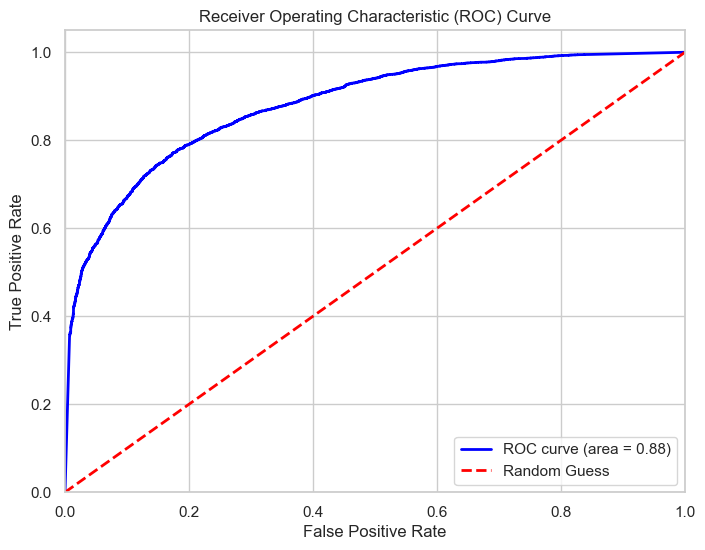

In [89]:
from sklearn.metrics import roc_curve, auc

predictions_proba = knn_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Random Forest:

In [61]:

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

precision_list, recall_list, f1_list, support_list = [], [], [], []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    random_forest_model.fit(X_train, y_train)
    y_pred = random_forest_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)

avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

report = (
    f"Random Forest - Final Evaluation (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)
print(report)


Random Forest - Final Evaluation (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.99        0.99        0.99        4529        
1           0.99        0.99        0.99        5550        

Accuracy    0.99        
Macro Avg   0.99        0.99        0.99        10079       
Weighted Avg0.99        0.99        0.99        10079       



In [62]:
# Define the expanded parameter grid for hyperparameter tuning
param_grid = {
    "n_estimators": [50, 100, 200, 300, 500],  # Number of trees in the forest
    "max_depth": [None, 10, 20, 30, 40],  # Depth of trees
    "min_samples_split": [2, 5, 10],  # Minimum samples to split
    "min_samples_leaf": [1, 2, 4],  # Minimum samples per leaf
    "bootstrap": [True, False],  # Bootstrap sampling
    "max_features": ["auto", "sqrt", "log2"],  # Number of features to consider
    "criterion": ["gini", "entropy"],  # Splitting criterion
    "class_weight": [None, "balanced"]  # Handle class imbalance
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    n_iter=20,  # Randomly sample 20 combinations
    cv=kf,
    scoring="accuracy",
    verbose=1,
    n_jobs=-1,
    random_state=42
)


# Fit the randomized search to the data
random_search.fit(X, y)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\Dorra\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Dorra\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Dorra\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Dorra\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Dorra\anaconda3\Lib\site-packages\s

Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True}
Best Cross-Validation Accuracy: 0.9898


In [63]:
# Update Random Forest model with the best parameters
random_forest_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    bootstrap=best_params['bootstrap'],
    max_features=best_params['max_features'],
    criterion=best_params['criterion'],
    class_weight=best_params['class_weight'],
    random_state=42
)

# Evaluate the updated model using K-Fold CV
precision_list, recall_list, f1_list, support_list = [], [], [], []
confusion_matrices = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    random_forest_model.fit(X_train, y_train)
    y_pred = random_forest_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)
    
    # Compute and store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Compute average precision, recall, f1-score
avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

# Compute final confusion matrix (sum of all folds)
final_confusion_matrix = np.sum(confusion_matrices, axis=0)

# Generate report
report = (
    f"Random Forest - Final Evaluation (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)

print(report)
print("Final Confusion Matrix:")
print(final_confusion_matrix)


Random Forest - Final Evaluation (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.99        0.99        0.99        4529        
1           0.99        0.99        0.99        5550        

Accuracy    0.99        
Macro Avg   0.99        0.99        0.99        10079       
Weighted Avg0.99        0.99        0.99        10079       

Final Confusion Matrix:
[[22395   250]
 [  266 27486]]


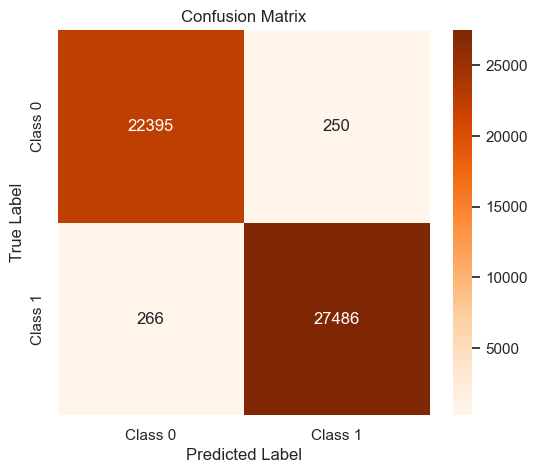

In [64]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

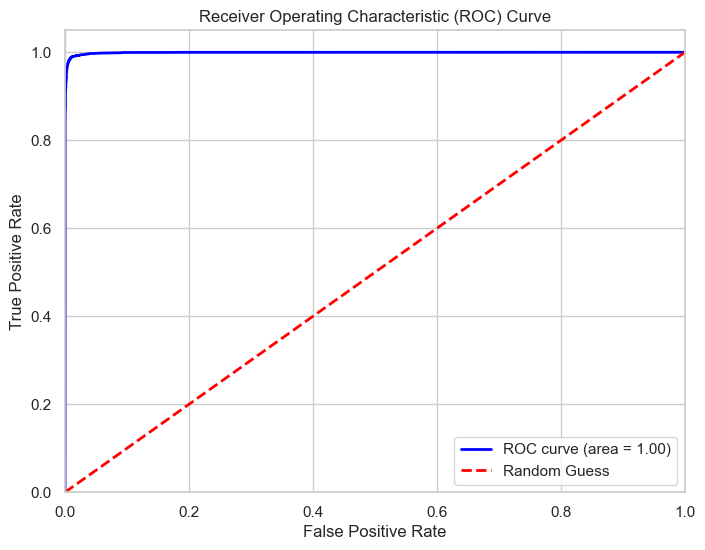

In [91]:
from sklearn.metrics import roc_curve, auc

predictions_proba = random_forest_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Deep Learning Models:

Fully Connected Neural Network (Feedforward Neural Network):

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

# Build MLP Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
y_pred_probs = model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Epoch 1/20


c:\Users\Dorra\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5411 - loss: 8.8076 - val_accuracy: 0.5598 - val_loss: 0.6697
Epoch 2/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5540 - loss: 0.6683 - val_accuracy: 0.5596 - val_loss: 0.6615
Epoch 3/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5610 - loss: 0.6660 - val_accuracy: 0.5719 - val_loss: 0.6599
Epoch 4/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5599 - loss: 0.6626 - val_accuracy: 0.5702 - val_loss: 0.6611
Epoch 5/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5583 - loss: 0.6619 - val_accuracy: 0.5739 - val_loss: 0.6598
Epoch 6/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5554 - loss: 0.6617 - val_accuracy: 0.5711 - val_loss: 0.6592
Epoch 7/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5593 - loss: 0.6603 - val_accuracy: 0.5742 - val_loss: 0.6527
Epoch 8/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5598 - loss: 0.6624 - val_accurac

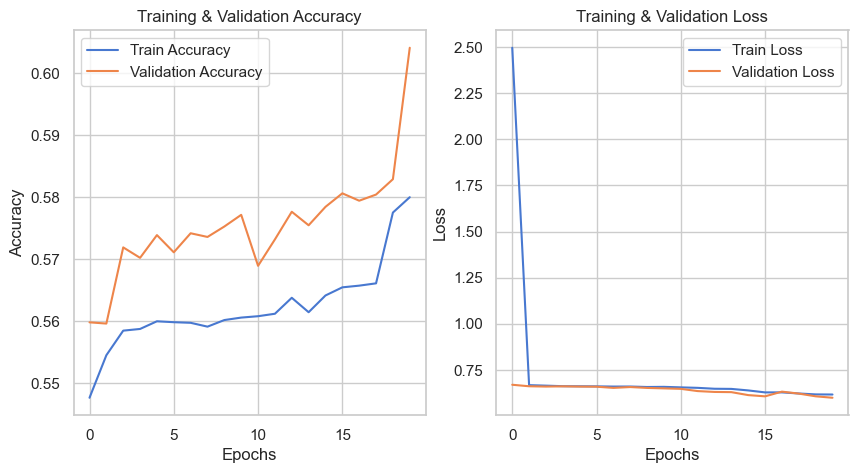

In [76]:
# Plot Training History
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()


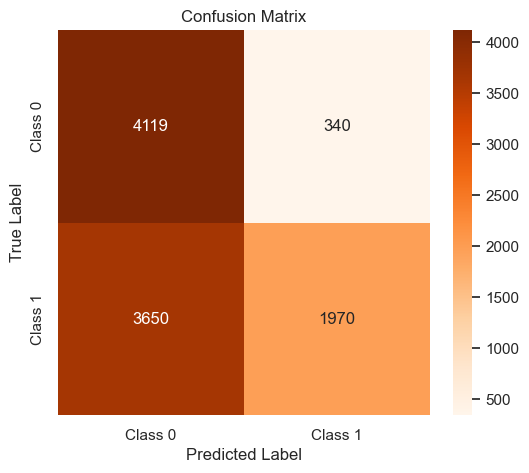

In [77]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Hyperparameter Tuning:

Reloading Tuner from tuning_dir\mlp_tuning\tuner0.json
Best Hyperparameters: {'units1': 128, 'units2': 256, 'dropout': 0.2, 'lr': 0.0001}
Epoch 1/20


c:\Users\Dorra\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5276 - loss: 13.7771 - val_accuracy: 0.6014 - val_loss: 0.9033
Epoch 2/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5625 - loss: 0.9594 - val_accuracy: 0.6097 - val_loss: 0.6578
Epoch 3/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5995 - loss: 0.6690 - val_accuracy: 0.6118 - val_loss: 0.6494
Epoch 4/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6117 - loss: 0.6523 - val_accuracy: 0.6319 - val_loss: 0.6484
Epoch 5/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6217 - loss: 0.6503 - val_accuracy: 0.6374 - val_loss: 0.6399
Epoch 6/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6275 - loss: 0.6413 - val_accuracy: 0.6400 - val_loss: 0.6415
Epoch 7/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6325 - loss: 0.6401 - val_accuracy: 0.6311 - val_loss: 0.6320
Epoch 8/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6346 - loss: 0.6322 - val_accura

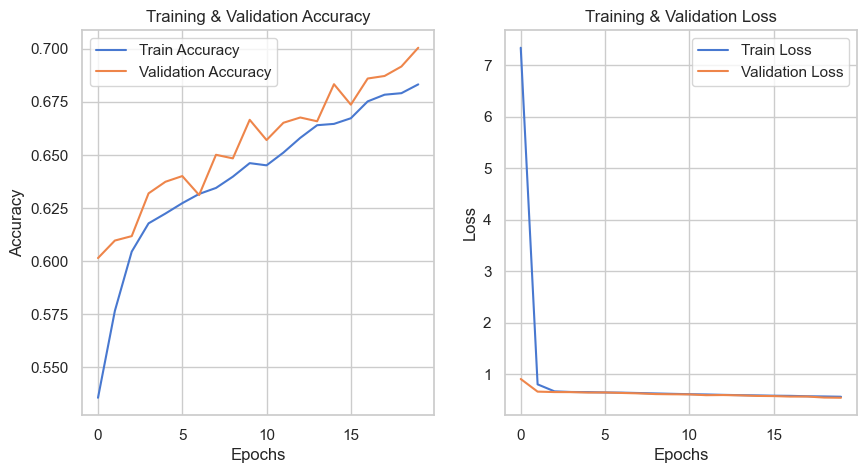

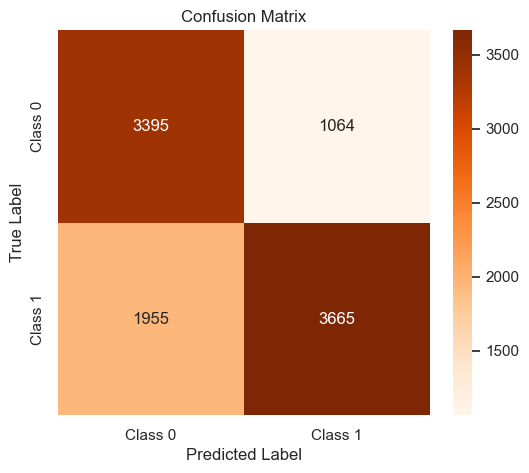

In [82]:
import kerastuner as kt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

##################### VERSION 2
# Function to build model for hyperparameter tuning
def build_model(hp):
    model = Sequential([
        Dense(hp.Int('units1', min_value=32, max_value=256, step=32), activation='relu', input_shape=(X_train.shape[1],)),
        Dense(hp.Int('units2', min_value=32, max_value=256, step=32), activation='relu'),
        Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('lr', [0.001, 0.0005, 0.0001])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Hyperparameter tuning
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='tuning_dir',
    project_name='mlp_tuning'
)

tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

# Build and train model with best hyperparameters
model = build_model(best_hps)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
y_pred_probs = model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot Training History
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Early Stopping:

Epoch 1/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6853 - loss: 0.5579 - val_accuracy: 0.6760 - val_loss: 0.5678
Epoch 2/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6827 - loss: 0.5561 - val_accuracy: 0.6924 - val_loss: 0.5458
Epoch 3/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6893 - loss: 0.5449 - val_accuracy: 0.6952 - val_loss: 0.5383
Epoch 4/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6935 - loss: 0.5448 - val_accuracy: 0.7103 - val_loss: 0.5297
Epoch 5/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6891 - loss: 0.5484 - val_accuracy: 0.7057 - val_loss: 0.5327
Epoch 6/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6947 - loss: 0.5431 - val_accuracy: 0.6999 - val_loss: 0.5191
Epoch 7/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7013 - loss: 0.5352 - val_accuracy: 0.7146 - val_loss: 0.5179
Epoch 8/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6961 - loss: 0.5375 - 

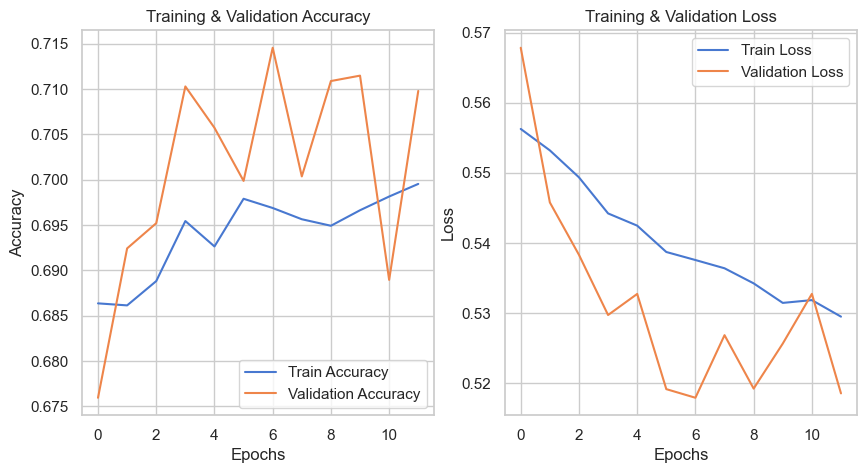

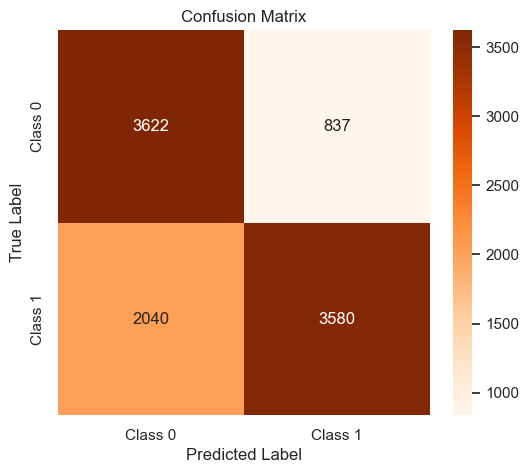

In [83]:
# Implement Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate Model
y_pred_probs = model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot Training History
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

TabNet:

In [103]:
%pip install pytorch-tabnet

from pytorch_tabnet.tab_model import TabNetClassifier

# Convert to float32 (required for TabNet)
X_train, X_test = X_train.astype(np.float32), X_test.astype(np.float32)

# Initialize and Train TabNet Model
tabnet_model = TabNetClassifier()
tabnet_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=['accuracy'],
    patience=10,
    max_epochs=100,
    batch_size=256,
    virtual_batch_size=128,
    num_workers=0
)

# Predictions
y_pred_probs = tabnet_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Feature Importance
feature_importances = tabnet_model.feature_importances_
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("TabNet Feature Importance")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'pytorch_tabnet'

~##################################################################################################################


In [27]:

###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################


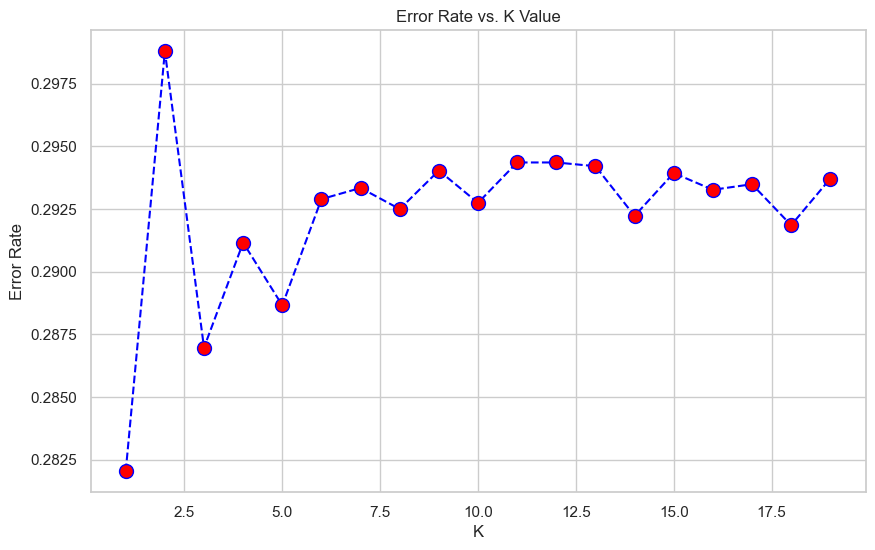

K-Nearest Neighbors with Best K (1)


NameError: name 'confusion_matrix' is not defined

In [28]:
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
# Choosing the best K for KNN using Cross-Validation
error_rate = []
k_values = range(1, 20)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=kf)
    error_rate.append(1 - scores.mean())  # Convert accuracy to error rate

plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# Final KNN Model with Best K
best_k = k_values[np.argmin(error_rate)]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

# Print KNN Evaluation Metrics
print(f'K-Nearest Neighbors with Best K ({best_k})')
print(confusion_matrix(y_test, knn_preds))
print(classification_report(y_test, knn_preds))

# Confusion Matrix Display
cf = confusion_matrix(y_test, knn_preds, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=knn.classes_)
disp.plot()
plt.show()


Traditional Machine Learning Models:

1- Logistic Regression:

Let's determine the hyperparameters and fit models using L1 and L2 regularization.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# Define a custom grid for Cs to ensure a wide range of values are tested
custom_cs = [0.001, 0.01, 0.1, 1, 10, 100]

# L1 regularized logistic regression with cross-validation
lr_l1 = LogisticRegressionCV(Cs=custom_cs, cv=kf, penalty='l1', solver='liblinear', verbose=0)
lr_l1.fit(X_train, y_train)

# Extract best C value and cross-validation scores
best_C = lr_l1.C_[0]
cv_scores = lr_l1.scores_[1]

print(f"Best C value (L1 regularized): {best_C}")
print(f"Cross-validated scores for each parameter: {cv_scores}")

best_score = cv_scores.mean(axis=0)[custom_cs.index(best_C)]
print(f"Mean cross-validated score for best C value: {best_score}")

In [ ]:
# L2 regularized logistic regression with cross-validation
lr_l2 = LogisticRegressionCV(Cs=custom_cs, cv=kf, penalty='l2', solver='liblinear')
lr_l2.fit(X_train, y_train)

# Extract best C value and cross-validation scores
best_C = lr_l2.C_[0]
cv_scores = lr_l2.scores_[1]

print(f"Best C value (L2 regularized): {best_C}")
print(f"Cross-validated scores for each parameter: {cv_scores}")

best_score = cv_scores.mean(axis=0)[custom_cs.index(best_C)]
print(f"Mean cross-validated score for best C value: {best_score}")



The scores are quite low and very similar. Let's proceed with the L2 regularized model. 
Now, we will predict the class for L2 regularized model.


In [36]:
# Final Logistic Regression Predictions
l2_preds = lr_l2.predict(X_test)

Evaluation:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print("Logistic Regression (L2) - Final Evaluation")
print(classification_report(y_test, l2_preds))

Confusion Matrix:

In [ ]:
# Confusion Matrix for Logistic Regression
cf = confusion_matrix(y_test, l2_preds, normalize='true')

sns.set_theme(style="white", context="talk")
disp = ConfusionMatrixDisplay(confusion_matrix=cf)
disp.plot()
plt.show()

As we can see, 73% of poisonous mushrooms are labeled correctly. But we have a big confusion in edible mushrooms, almost half of them (45%) are labeled as poisonous. We will need different model. Let's try another simple model KNN.

2- K-Nearest Neighbors:

We will start with k=1, and later will choose better K value.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

In [44]:
knn_preds = knn.predict(X_test)


Evaluation:

In [ ]:
print(classification_report(y_test, knn_preds))


In [ ]:
print(confusion_matrix(y_test,knn_preds))


Choosing a K Value

In [47]:
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), error_rate, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');


Here we can see that at K=3 the error rate is the lowest and it's around 0.013. Let's retrain the KNN model with K=3.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
knn_preds = knn.predict(X_test)

print('K Nearest Neighbors')
print('\n')
print(confusion_matrix(y_test,knn_preds))
print('\n')
print(classification_report(y_test,knn_preds))

In [ ]:
cf = confusion_matrix(y_test, knn_preds, normalize='true')

sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=knn.classes_)
disp.plot()
plt.show()